# Povezava do vira podatkovne zbirke: https://podatki.gov.si/dataset/surs0867636s

## STOPNJA TVEGANJA REVŠČINE, STATISTIČNE REGIJE

![Prikaz posameznih statističnih regij](../../slike/statisticne_regije.png)

In [131]:
import warnings
warnings.simplefilter("ignore", category = FutureWarning)

# Uvozimo vse potrebne knjižnice
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
import seaborn as sns
import plotly.express as px
import geopandas as gpd
import matplotlib.cm as cm


# OPOMBE:
# Najprej smo opravili osnovno transformacijo podatkov s pomočjo programa PX-Win
# (izbor podatkov, transformacijo vrstic in stolpcev)
# Datoteko smo shranili kot .csv, ki ima podatke ločene z ';'
# V Excelu smo šumnike nadomestili s sprejemljivimi inačicami (Š - S, Č - C, Ž - Z)

# Uvozimo .csv datoteko, ki za delimiter uporablja ';'
tveganje_revscine = pd.read_csv("../../podatki/stopnja_tveganja_revscine/stopnja_tveganja_revscine.csv", sep = ";")

# Pretvorimo imena stolpcev v velike črke
tveganje_revscine.columns = tveganje_revscine.columns.str.upper()

# Pretvorimo vrstice v velike črke
tveganje_revscine['MERITVE'] = tveganje_revscine['MERITVE'].apply(lambda x: x.upper())

# Zaradi kasnejših pretvorb v 'FLOAT' nadomestimo vse ',' s '.'
tveganje_revscine.iloc[:, 1:] = tveganje_revscine.iloc[:, 1:].applymap(lambda x: x.replace(',', '.') if isinstance(x, str) else x)

# Izberemo 5 najbljižjih sosedov
imputer = KNNImputer(n_neighbors=5)

# Nad vsakim stolpec uporabimo KNNImputer, da nadomestimo manjkajoče vrednosti z napovedjo
tveganje_revscine.iloc[:, 1:] = imputer.fit_transform(tveganje_revscine.iloc[:, 1:])

# Prvi stolpec pretvorimo v 'STRING'
tveganje_revscine.iloc[:, 0] = tveganje_revscine.iloc[:, 0].astype(str)
# Drugi stolpec pretvorimo v 'INTEGER'
tveganje_revscine.iloc[:, 1] = tveganje_revscine.iloc[:, 1].astype(int)
# Preostale stolpce pretvorimo v 'FLOAT'
tveganje_revscine.iloc[:, 1:] = tveganje_revscine.iloc[:, 1:].astype(float)

In [132]:
# Shranimo v .xlsx datoteko
tveganje_revscine.to_excel('stopnja_tveganja_revscine.xlsx', index=False)

In [133]:
# Pregled vseh stolpcev
stopnja_tveganja_revscine = tveganje_revscine[tveganje_revscine['MERITVE'] == 'STOPNJA TVEGANJA REVSCINE (% OSEB)']
st_oseb_pod_pragom = tveganje_revscine[tveganje_revscine['MERITVE'] == 'STEVILO OSEB POD PRAGOM TVEGANJA REVSCINE']

stopnja_tveganja_revscine

,MERITVE,LETO,SLOVENIJA,POMURSKA,PODRAVSKA,KOROSKA,SAVINJSKA,ZASAVSKA,POSAVSKA,JUGOVZHODNA SLOVENIJA,OSREDNJESLOVENSKA,GORENJSKA,PRIMORSKO-NOTRANJSKA,GORISKA,OBALNO-KRASKA
0,STOPNJA TVEGANJA REVSCINE (% OSEB),2008.0,12.3,20.1,18.8,15.2,14.5,9.0,14.9,12.4,8.3,8.7,8.2,7.6,10.6
1,STOPNJA TVEGANJA REVSCINE (% OSEB),2009.0,11.3,18.8,15.8,12.8,11.9,11.1,12.0,11.7,7.8,7.7,10.4,9.1,13.4
2,STOPNJA TVEGANJA REVSCINE (% OSEB),2010.0,12.7,21.3,17.9,15.3,14.2,10.6,14.3,12.1,8.5,10.7,11.9,9.1,12.5
3,STOPNJA TVEGANJA REVSCINE (% OSEB),2011.0,13.6,20.6,18.5,15.4,15.1,12.6,14.6,14.2,9.8,12.5,12.2,9.4,14.2
4,STOPNJA TVEGANJA REVSCINE (% OSEB),2012.0,13.5,19.2,18.7,12.9,14.2,13.2,16.5,17.2,9.7,11.3,9.2,11.4,13.9
5,STOPNJA TVEGANJA REVSCINE (% OSEB),2013.0,14.5,19.9,18.1,14.8,15.3,14.0,20.1,16.2,11.1,12.8,8.5,13.7,14.5
6,STOPNJA TVEGANJA REVSCINE (% OSEB),2014.0,14.5,17.5,17.3,14.8,15.0,14.7,19.9,17.4,11.4,13.3,11.3,12.3,15.1
7,STOPNJA TVEGANJA REVSCINE (% OSEB),2015.0,14.3,15.3,15.9,14.5,16.8,13.5,16.1,15.7,11.8,13.3,10.6,15.2,13.7
8,STOPNJA TVEGANJA REVSCINE (% OSEB),2016.0,13.9,14.9,15.5,13.0,15.0,15.0,17.3,13.9,12.5,14.2,9.5,14.8,8.7
9,STOPNJA TVEGANJA REVSCINE (% OSEB),2017.0,13.3,14.6,16.4,13.5,15.4,12.0,18.5,12.4,11.5,12.4,8.4,9.8,10.7


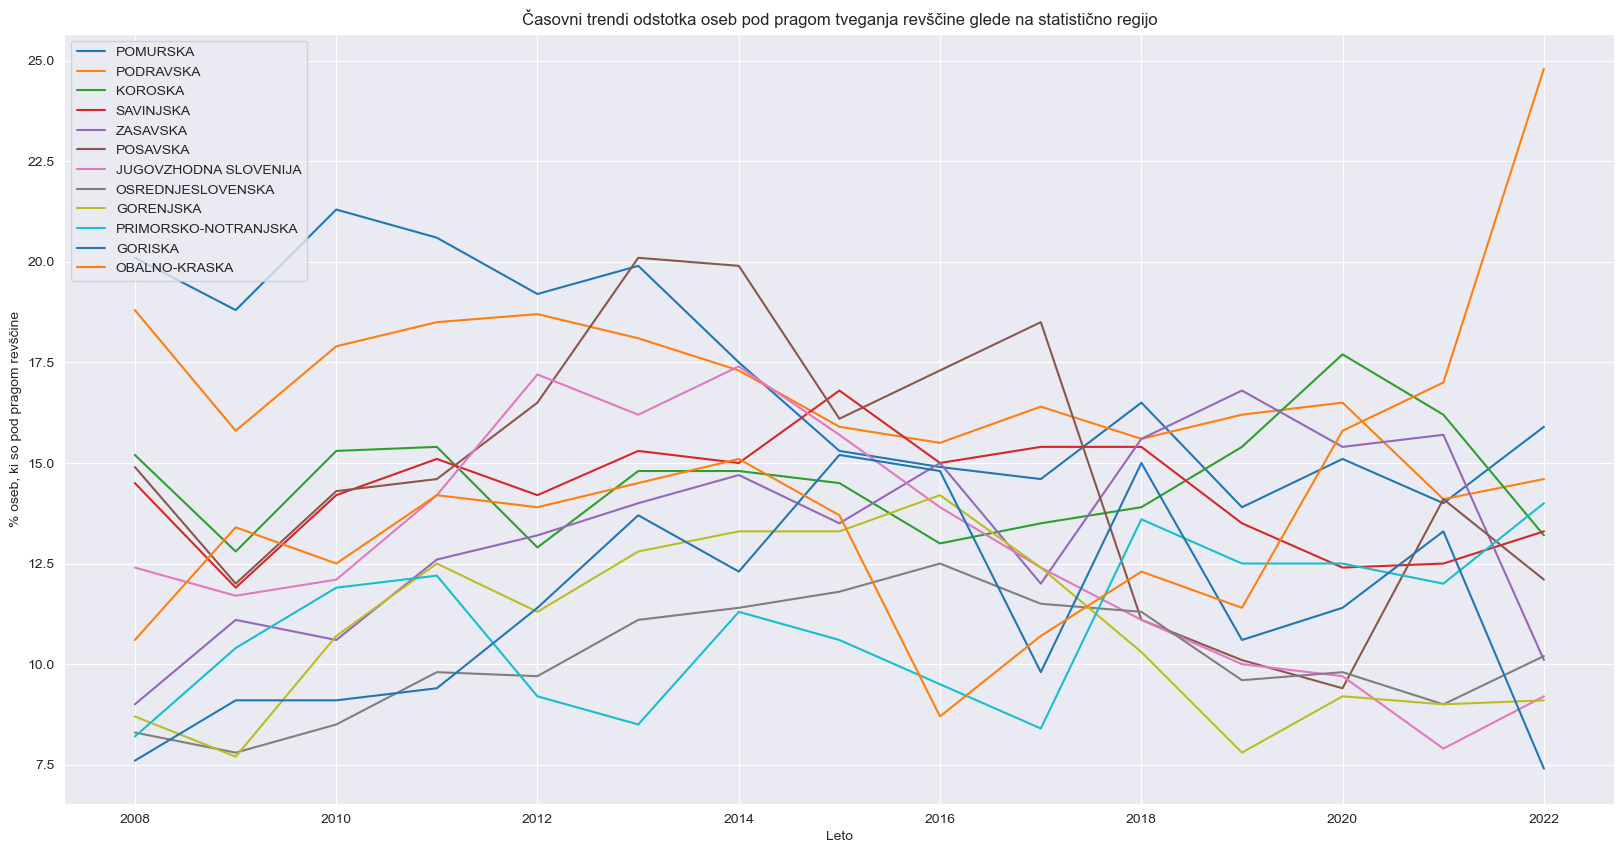

In [134]:
df = stopnja_tveganja_revscine
df_trend = df.iloc[:, 3:]  # Podatki regij
regije = df_trend.columns.tolist()

df_trend['Leto'] = pd.to_datetime(df.iloc[:, 1], format='%Y') # Pretvorimo leto
df_trend.set_index('Leto', inplace=True) # Leto nastavimo kot indeks

plt.figure(figsize=(20,10))
# Prikaz časovnih trendov za vsako regijo
for regija in regije:
    plt.plot(df_trend.index, df_trend[regija], label=regija)

# Nastavitve grafa
plt.xlabel('Leto')
plt.ylabel('% oseb, ki so pod pragom revščine')
plt.title('Časovni trendi odstotka oseb pod pragom tveganja revščine glede na statistično regijo')
plt.legend(loc='upper left')
plt.show()

---

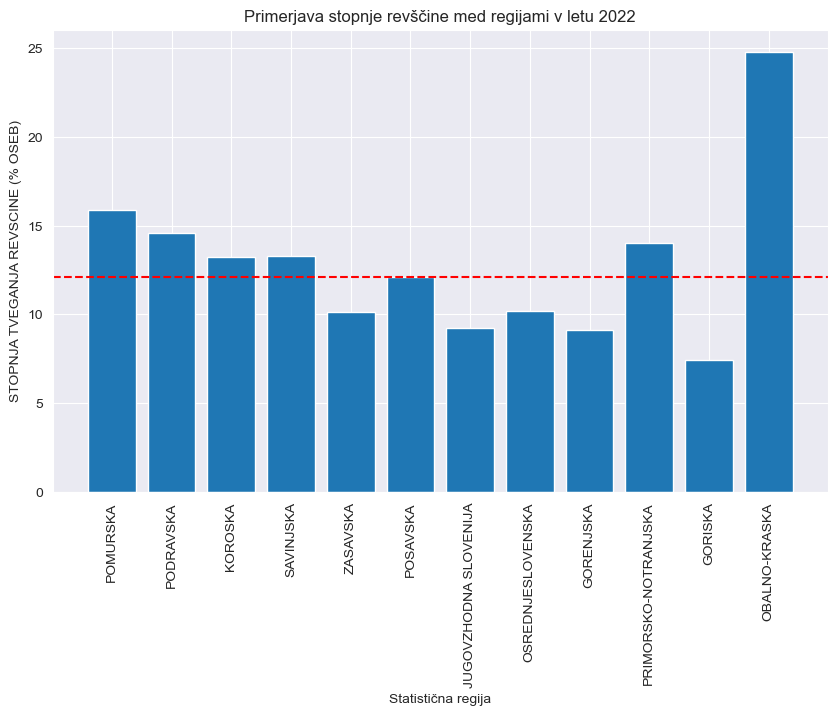

12.1

In [135]:
df = stopnja_tveganja_revscine

df_selected = df.iloc[:, 1:]
df_selected.columns = ['Leto'] + list(df_selected.columns[1:])
df_2022 = df_selected[df_selected['Leto'] == 2022]
df_2022 = df_2022.sort_values(by=df_2022.columns[0])

povprecje = df_2022.iloc[:, 1].mean()


plt.figure(figsize=(10, 6))
plt.bar(df_2022.columns[2:], df_2022.iloc[:, 2:].values.flatten())
plt.xlabel('Statistična regija')
plt.xticks(rotation='vertical')
plt.ylabel('STOPNJA TVEGANJA REVSCINE (% OSEB)')
plt.title('Primerjava stopnje revščine med regijami v letu 2022')
plt.axhline(y=povprecje, color='red', linestyle='--', label='Povprečje za Slovenijo')
plt.show()

povprecje

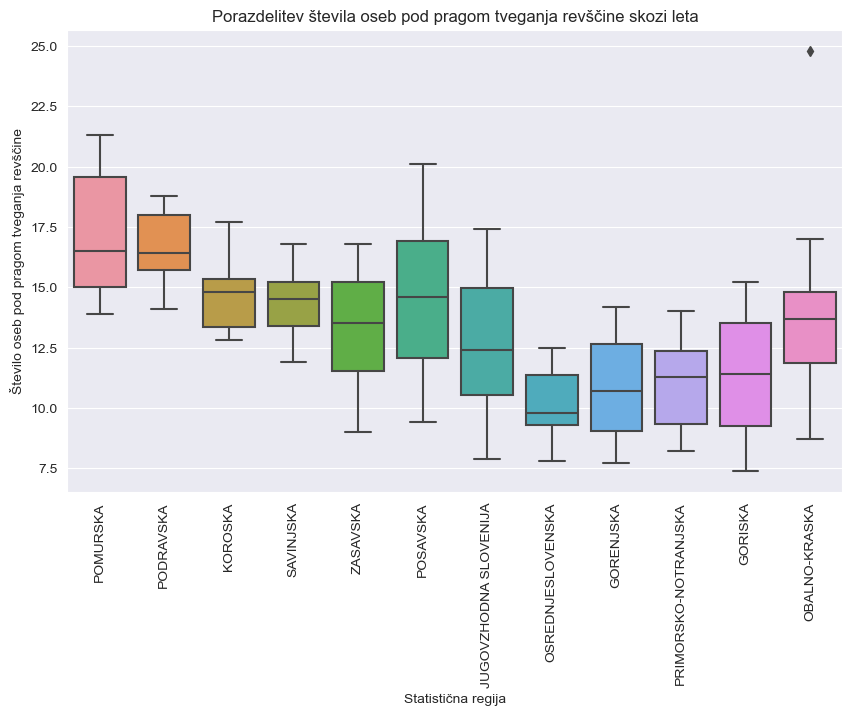

In [136]:
df_selected = df.iloc[:, 1:]
df_selected.columns = ['Leto'] + list(df_selected.columns[1:])
df_combined = df_selected.iloc[:, 2:]

plt.figure(figsize=(10, 6))

# Prikaz združenega boxplot diagrama za več let
sns.boxplot(data=df_combined)

# Nastavitve grafa
plt.xlabel('Statistična regija')
plt.xticks(rotation='vertical')
plt.ylabel('Število oseb pod pragom tveganja revščine')
plt.title('Porazdelitev števila oseb pod pragom tveganja revščine skozi leta')

# Prikaz grafa
plt.show()

In [137]:
df_selected = df.iloc[:, 1:]
df_selected.columns = ['Leto'] + list(df_selected.columns[1:])

fig = px.imshow(df_selected.iloc[:, 1:].transpose(), x=df_selected['Leto'], y=df_selected.columns[1:],
                color_continuous_scale='viridis', title='Stopnja tveganja revščine po regijah',
                labels={'x': 'Leto', 'y': 'Regija'})
fig.update_layout(yaxis_autorange='reversed')
fig.show()

In [138]:
df_selected = df.iloc[:, [1] + list(range(4, len(df.columns)))]
df_selected.columns = ['Leto'] + list(df_selected.columns[1:])
fig = px.violin(df_selected.melt(id_vars='Leto'), x='Leto', y='value', color='variable', title='Stopnja tveganja revščine po regijah',
                labels={'value': 'Stopnja tveganja revščine', 'Leto': 'Leto', 'variable': 'Regija'}, box=True, points='all')
fig.show()

In [139]:
fp = "../../podatki/regije/regije.shx"
map_df = gpd.read_file(fp)
map_df.head()

map_df['REGIJA'] = [
    'GORENJSKA',
    'GORISKA',
    'JUGOVZHODNA SLOVENIJA',
    'KOROSKA',
    'PRIMORSKO-NOTRANJSKA',
    'OBALNO-KRASKA',
    'OSREDNJESLOVENSKA',
    'PODRAVSKA',
    'POMURSKA',
    'SAVINJSKA',
    'POSAVSKA',
    'ZASAVSKA',
]


df = stopnja_tveganja_revscine
output_path = "../../slike/zemljevidi/"
seznam_let = ['2008', '2009', '2010', '2011', '2012', '2013', '2014',
              '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']
for i, year in enumerate(seznam_let):
    selected_row = df.iloc[i, 3:]
    selected_row = selected_row.rename_axis('REGIJA')
    joined_df = map_df.merge(selected_row, on='REGIJA', how='left')
    joined_df = joined_df.rename(columns={joined_df.columns[2]: 'STOPNJA TVEGANJA REVSCINE (% OSEB)'})

    variable = 'STOPNJA TVEGANJA REVSCINE (% OSEB)'

    fig, ax = plt.subplots(1, figsize=(10, 6))
    joined_df.plot(column=variable, cmap='autumn_r', linewidth=0.8, ax=ax, edgecolor='0.8')

    ax.axis('off')
    ax.set_title("Stopnja tveganja revščine (% oseb) " + "(" + year + ")", fontdict={'fontsize': '25', 'fontweight': '3'})

    cmap = plt.cm.get_cmap('autumn_r')

    sm = cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=0, vmax=30))
    sm.set_array([])
    cbar = plt.colorbar(sm)

    fig.savefig(output_path + year + '.png', dpi=300)
    plt.close(fig)






C:\Users\Kristhe\AppData\Local\Temp\ipykernel_5456\1768073626.py:39: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.

C:\Users\Kristhe\AppData\Local\Temp\ipykernel_5456\1768073626.py:43: MatplotlibDeprecationWarning:

Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.

C:\Users\Kristhe\AppData\Local\Temp\ipykernel_5456\1768073626.py:39: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.

C:\Users\Kristhe\AppData\Local\Temp\ipykernel_5456\1768073626.py:43: Matplo

![Animiran prikaz stopnje tveganja revščine](../../slike/stopnja_tveganje_revscine.gif)